In [3]:
# The code was removed by Watson Studio for sharing.

,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.211615,0.111057,109.1890
1,0.211615,0.044128,109.1888
2,0.211615,0.020259,109.1886
3,0.211615,0.006087,109.1884
4,0.211615,-0.037426,109.1882


In [4]:

body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Oct1017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.428922,0.155923,98.3171
1,0.391013,0.138502,98.3168
2,0.359959,0.121377,98.3164
3,0.335122,0.115421,98.3161
4,0.323061,0.119413,98.3158


In [5]:
body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Feb2218.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.080387,0.017874,104.2436
1,0.080387,0.008358,104.2439
2,0.080387,0.000746,104.2432
3,0.080387,-0.008641,104.2429
4,0.080387,-0.017488,104.2426


In [6]:
body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Feb2818.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.165922,0.181418,108.9703
1,0.167845,0.185962,108.9700
2,0.171236,0.176856,108.9696
3,0.158129,0.177308,108.9693
4,0.165976,0.170441,108.9690


In [7]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

Using TensorFlow backend.


Text(0.5, 0.92, '3D Track Stiffness July 2017')

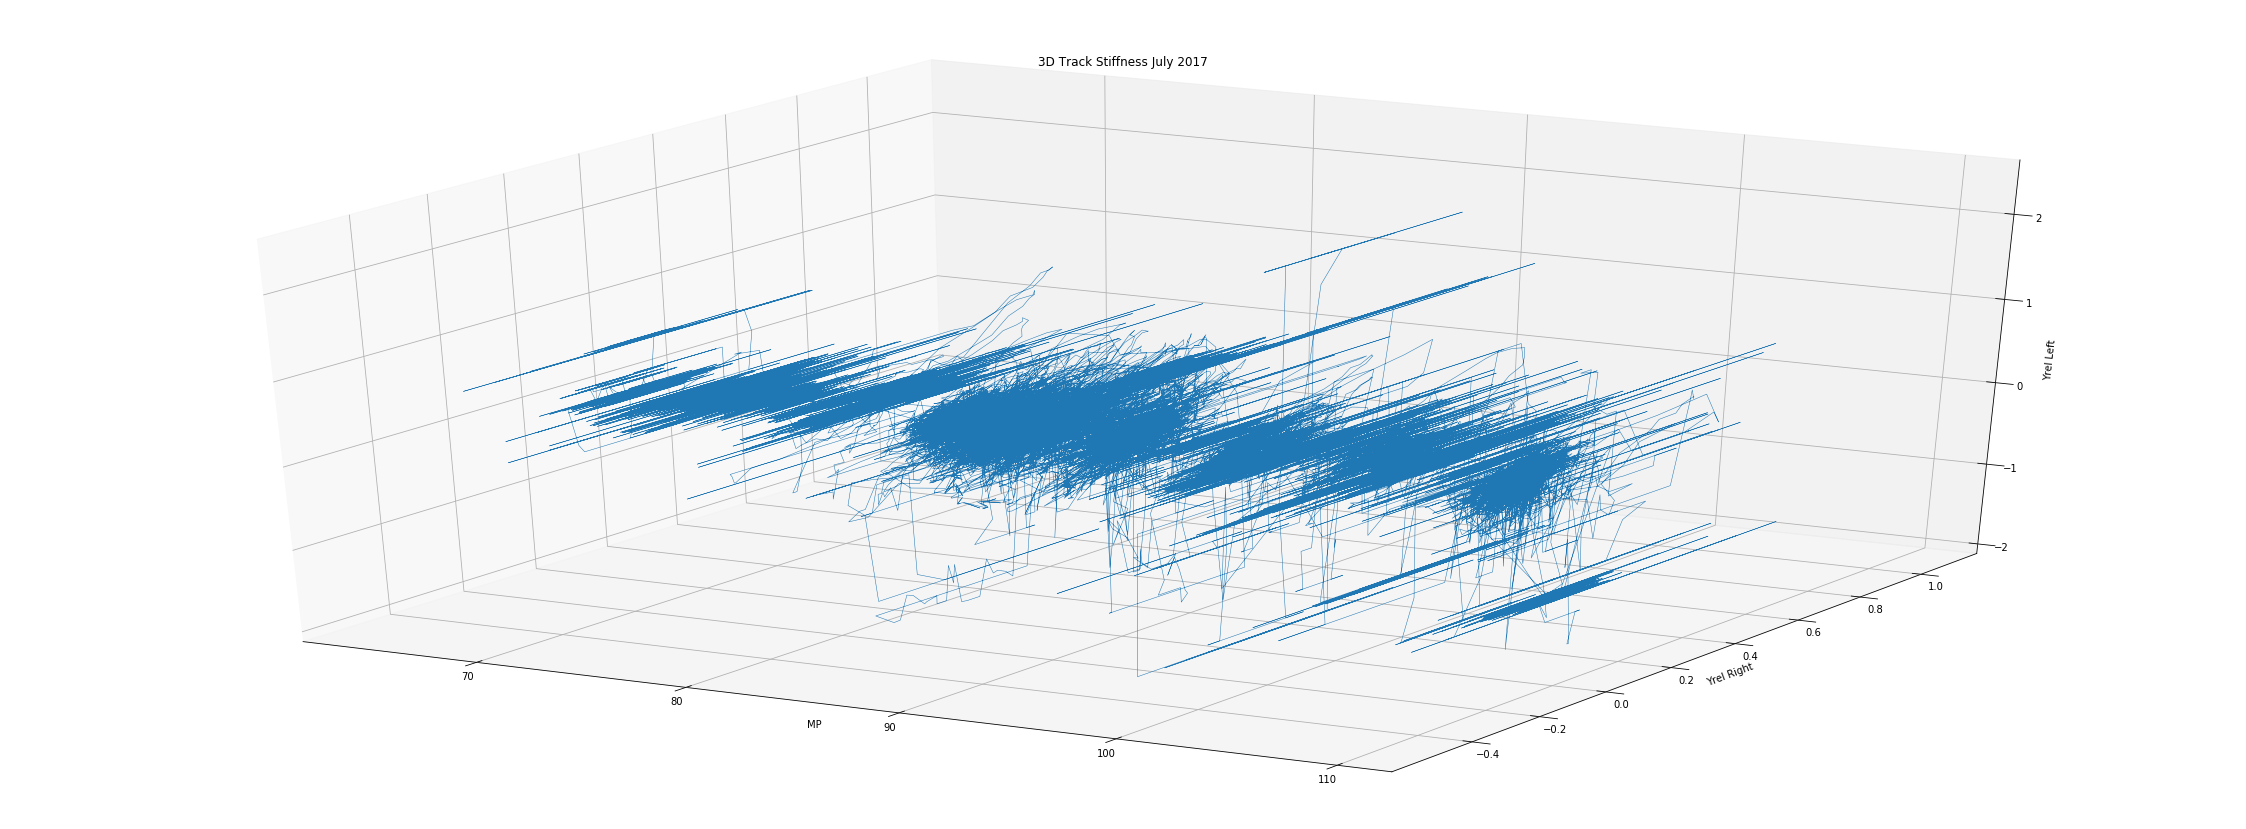

In [8]:
fig = plt.figure(figsize=(40,15))
ax = fig.gca(projection='3d')

ax.plot( df_data_1.MP, df_data_1.YREL_R__VAL__ADJ,df_data_1.YREL_L__VAL__ADJ ,lw=0.5)
ax.set_xlabel("MP")
ax.set_ylabel("Yrel Right")
ax.set_zlabel("Yrel Left")
ax.set_title("3D Track Stiffness July 2017")

Text(0.5, 0.92, '3D Track Stiffness October 10')

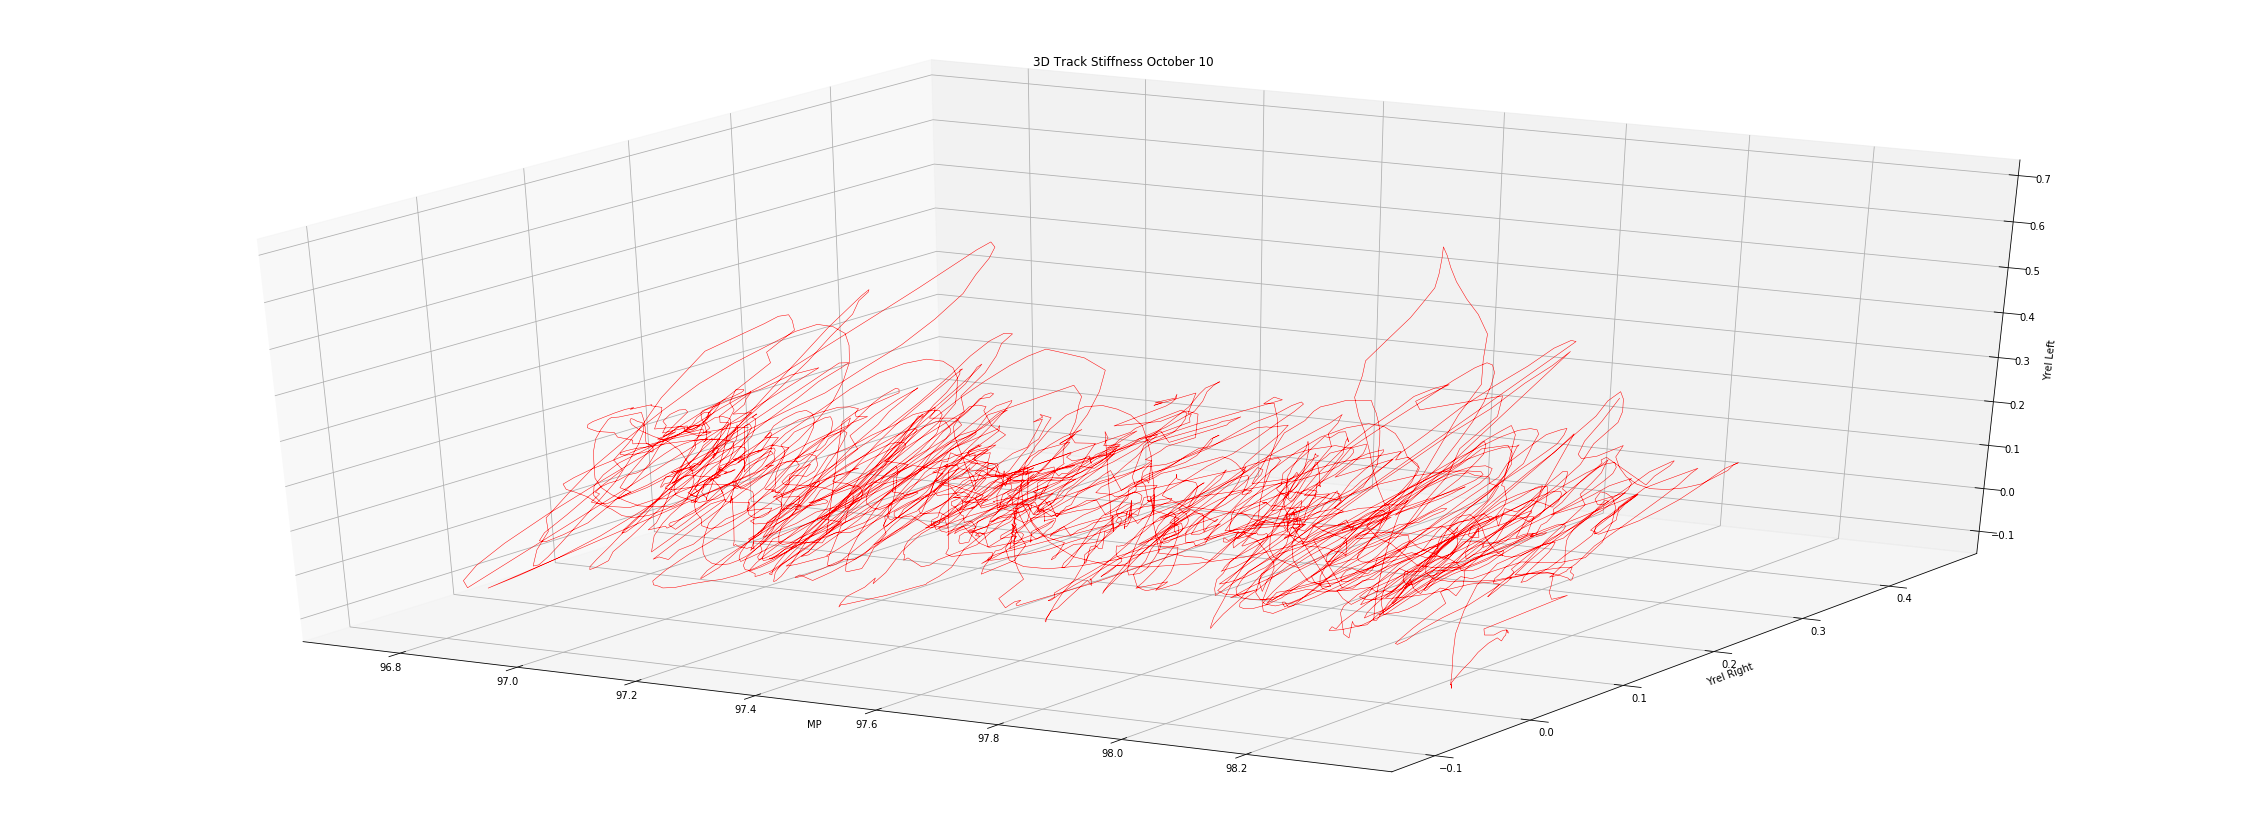

In [9]:
fig = plt.figure(figsize=(40,15))
ax = fig.gca(projection='3d')

ax.plot( df_data_2.MP, df_data_2.YREL_R__VAL__ADJ,df_data_2.YREL_L__VAL__ADJ ,lw=0.5, color = "r")
ax.set_xlabel("MP")
ax.set_ylabel("Yrel Right")
ax.set_zlabel("Yrel Left")
ax.set_title("3D Track Stiffness October 10")

Text(0.5, 0.92, '3D Track Stiffness February 22 2018')

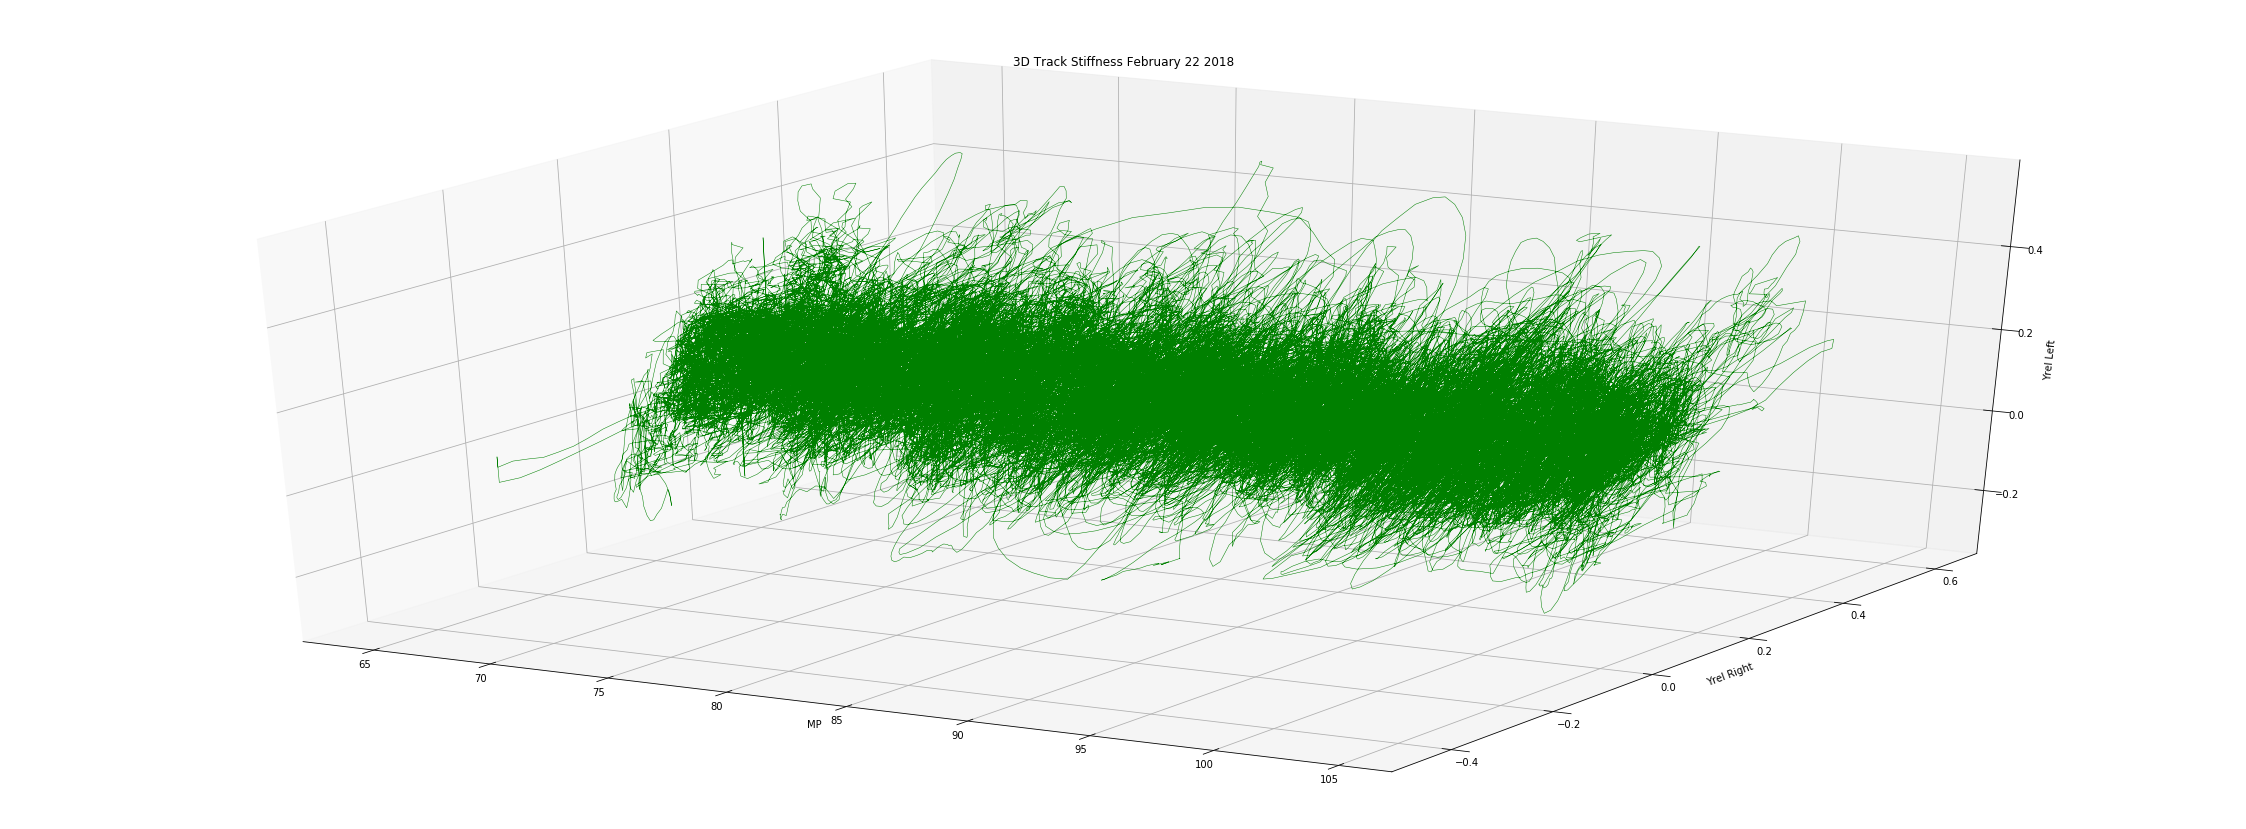

In [10]:
fig = plt.figure(figsize=(40,15))
ax = fig.gca(projection='3d')

ax.plot( df_data_3.MP, df_data_3.YREL_R__VAL__ADJ,df_data_3.YREL_L__VAL__ADJ ,lw=0.5, color = "g")
ax.set_xlabel("MP")
ax.set_ylabel("Yrel Right")
ax.set_zlabel("Yrel Left")
ax.set_title("3D Track Stiffness February 22 2018")

Text(0.5, 0.92, '3D Track Stiffness, February 28 2018')

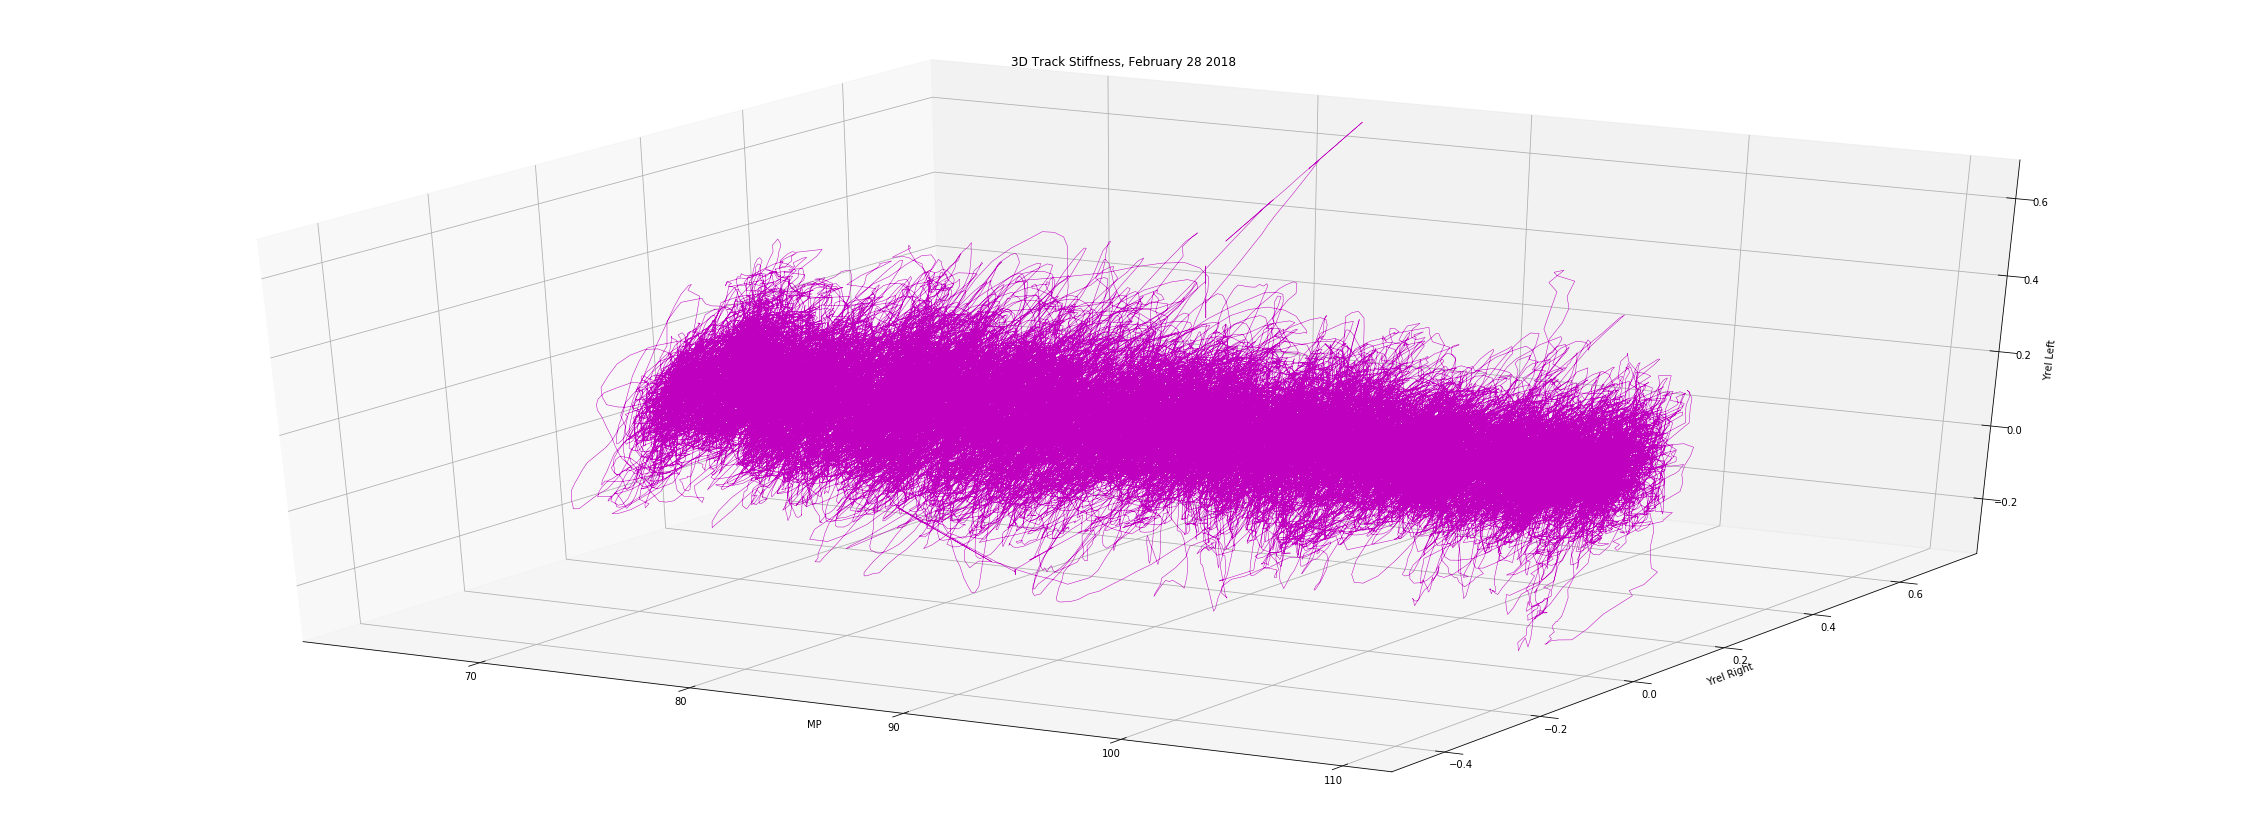

In [11]:
fig = plt.figure(figsize=(40,15))
ax = fig.gca(projection='3d')

ax.plot( df_data_4.MP, df_data_4.YREL_R__VAL__ADJ,df_data_4.YREL_L__VAL__ADJ ,lw=0.5, color = "m")
ax.set_xlabel("MP")
ax.set_ylabel("Yrel Right")
ax.set_zlabel("Yrel Left")
ax.set_title("3D Track Stiffness, February 28 2018")

### Notes:
#### Other inspection dates look extremely noisy. No observable trend from a 3D perspective
#### Anomaly Analysis starts only with the first and last Inspections July 2017, and February 28

## Discrete Fourier Transform (FFT Implementation) 

In [12]:
###Select only 130,000

In [13]:
data_healthy_fft = np.fft.fft(df_data_1[["YREL_L__VAL__ADJ","YREL_R__VAL__ADJ"]]).real[:5000,:] ##July
data_broken_fft = np.fft.fft(df_data_4[["YREL_L__VAL__ADJ","YREL_R__VAL__ADJ"]]).real[:5000,:]  ##February 2018

Let’s first have a look at the shape and contents of the arrays.

In [14]:
print (data_healthy_fft.shape)
print (data_healthy_fft)

(5000, 2)
[[ 0.32267168  0.1005579 ]
 [ 0.2557432   0.16748638]
 [ 0.23187375  0.19135584]
 ...
 [-0.95755197 -1.42481765]
 [-0.95270566 -1.42966397]
 [-0.94785934 -1.43451029]]


In [15]:
print (data_broken_fft.shape)
print (data_broken_fft)

(5000, 2)
[[ 0.34733993 -0.01549643]
 [ 0.35380636 -0.01811691]
 [ 0.34809205 -0.00561979]
 ...
 [ 0.12682019 -0.02635399]
 [ 0.12365051 -0.03439213]
 [ 0.1169345  -0.03168226]]


First, we notice that the shape is the same as the input data. So if we have 130000 samples, we get back 130000 spectrum values, or in other words 130000 frequency bands with the intensities.

The second thing we notice is that the data type of the array entries is not float anymore, it is complex. So those are not complex numbers, it is just a means for the algorithm the return two different frequency compositions in one go. The real part returns a sine decomposition and the imaginary part a cosine. We will ignore the cosine part in this example since it turns out that the sine part already gives us enough information to implement a good classifier.

But first let’s plot the two arrays to get an idea how a both frequency spectrum differ for each side of rail

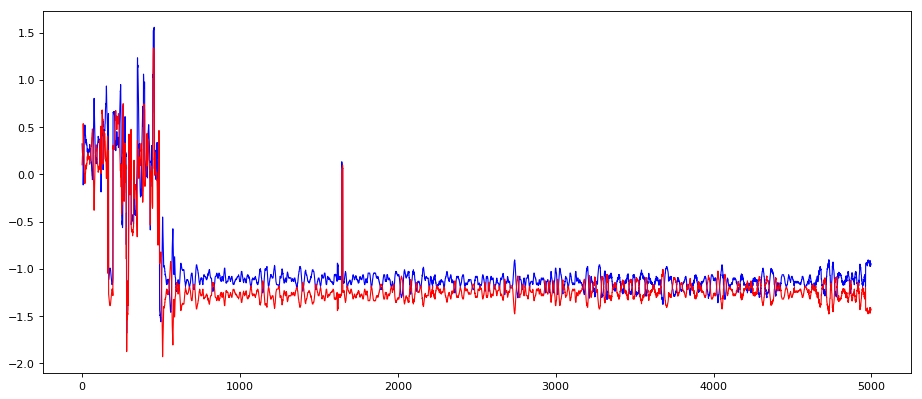

In [16]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_healthy_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].real, '-', color='red', animated = True, linewidth=1)


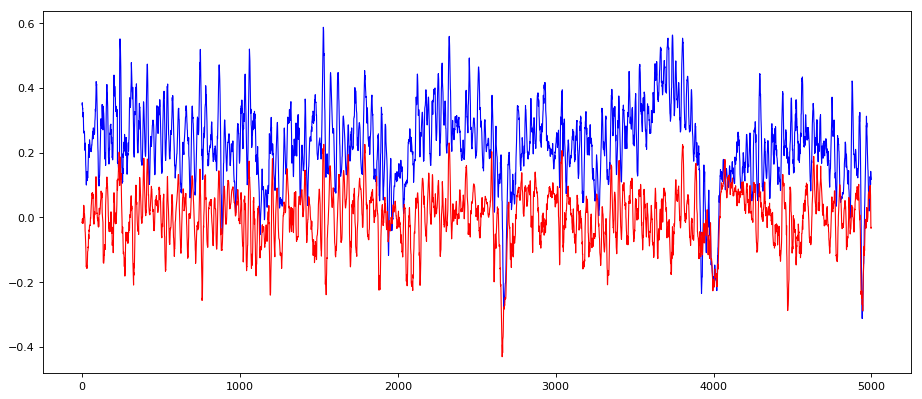

In [17]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_broken_fft)
ax.plot(range(0,size), data_broken_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].real, '-', color='red', animated = True, linewidth=1)


So, what we've been doing is so called feature transformation step. We’ve transformed the data set in a way that our machine learning algorithm – a deep feed forward neural network implemented as binary classifier – works better. So now let's scale the data to a 0..1

In [18]:
def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)

In [19]:
data_healthy_scaled = scaleData(data_healthy_fft)
data_broken_scaled = scaleData(data_broken_fft)

In [20]:
data_healthy_scaled = data_healthy_scaled.T
data_broken_scaled = data_broken_scaled.T

Now we reshape again to have two examples (rows) and 200000+ features (columns). Since we applied FFT on each column we've obtained 200000+ spectrum values for each of the 2 columns (side of rail). We are now using each column with the 200000+ spectrum values as one row (training example) and each of the 200000+ spectrum values becomes a column (or feature) in the training data set

In [25]:
data_healthy_scaled.reshape(2, 5000)
data_broken_scaled.reshape(2, 5000)

array([[0.73372395, 0.74090535, 0.73455923, ..., 0.48882235, 0.48530222,
        0.47784365],
       [0.62928152, 0.62531726, 0.64422294, ..., 0.61285618, 0.60069605,
        0.60479555]])

In [26]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [27]:
number_of_neurons_layer1 = 5000
number_of_neurons_layer2 = 5000
number_of_neurons_layer3 = 1
number_of_epochs = 100

In [28]:
#### your code here ###
dim = 5000
samples = 2

## Task

Now it’s time to create the model

In [29]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=sgd)

def train(data,label):
    #model.fit(#### your code here ###, #### your code here ###, epochs=number_of_epochs, batch_size=72, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])
    model.fit(data, label, epochs=number_of_epochs, batch_size=72, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])

def score(data):
    return model.predict(data)

### July (Healthy Data)

In [30]:
label_healthy = np.repeat(1,2)
label_healthy.shape = (2,1)
label_broken = np.repeat(0,2)
label_broken.shape = (2,1)

train_healthy = np.hstack((data_healthy_scaled,label_healthy))
train_broken = np.hstack((data_broken_scaled,label_broken))
train_both = np.vstack((train_healthy,train_broken))

In [31]:
pd.DataFrame(train_healthy)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.619040,0.598356,0.590979,0.58660,0.573152,0.560752,0.547155,0.484499,0.508529,0.537332,...,0.218790,0.237171,0.227888,0.218902,0.220400,0.221897,0.223395,0.224893,0.226390,1.0
1,0.621554,0.642037,0.649342,0.65368,0.666997,0.679277,0.692742,0.754792,0.730994,0.702471,...,0.159271,0.141068,0.150261,0.159160,0.157677,0.156194,0.154711,0.153228,0.151744,1.0


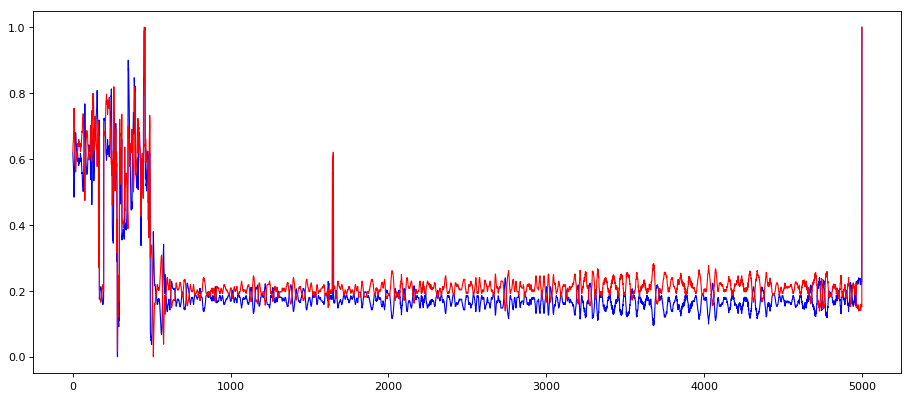

In [32]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

ax.plot(pd.DataFrame(train_healthy).T.iloc[:,[0]], '-', color='blue', animated = True, linewidth=1)
ax.plot(pd.DataFrame(train_healthy).T.iloc[:,[1]], '-', color='red', animated = True, linewidth=1)


### February (Broken Data)

In [33]:
pd.DataFrame(train_broken)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.733724,0.740905,0.734559,0.720505,0.721594,0.692503,0.695886,0.706712,0.689695,0.650654,...,0.473158,0.487343,0.482301,0.468208,0.460190,0.505340,0.488822,0.485302,0.477844,0.0
1,0.629282,0.625317,0.644223,0.623710,0.645970,0.623923,0.644791,0.647491,0.648149,0.690275,...,0.796289,0.790184,0.800543,0.778466,0.751969,0.647825,0.612856,0.600696,0.604796,0.0


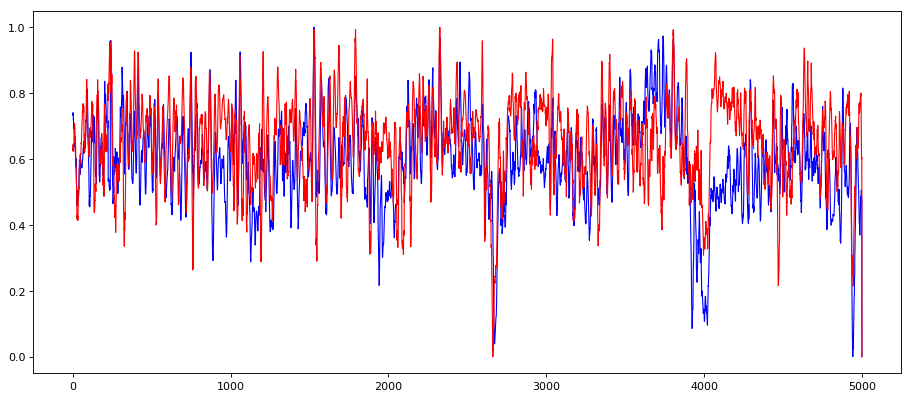

In [34]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

ax.plot(pd.DataFrame(train_broken).T.iloc[:,[0]], '-', color='blue', animated = True, linewidth=1)
ax.plot(pd.DataFrame(train_broken).T.iloc[:,[1]], '-', color='red', animated = True, linewidth=1)


In [35]:
pd.DataFrame(train_both)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.619040,0.598356,0.590979,0.586600,0.573152,0.560752,0.547155,0.484499,0.508529,0.537332,...,0.218790,0.237171,0.227888,0.218902,0.220400,0.221897,0.223395,0.224893,0.226390,1.0
1,0.621554,0.642037,0.649342,0.653680,0.666997,0.679277,0.692742,0.754792,0.730994,0.702471,...,0.159271,0.141068,0.150261,0.159160,0.157677,0.156194,0.154711,0.153228,0.151744,1.0
2,0.733724,0.740905,0.734559,0.720505,0.721594,0.692503,0.695886,0.706712,0.689695,0.650654,...,0.473158,0.487343,0.482301,0.468208,0.460190,0.505340,0.488822,0.485302,0.477844,0.0
3,0.629282,0.625317,0.644223,0.623710,0.645970,0.623923,0.644791,0.647491,0.648149,0.690275,...,0.796289,0.790184,0.800543,0.778466,0.751969,0.647825,0.612856,0.600696,0.604796,0.0


So those are frequency bands. Notice that although many frequency bands are having nearly the same energy, the neural network algorithm still can work those out which are significantly different. 

## Task

Now it’s time to do the training. We will provide the first 130000 columns of the array as the 1st parameter and column number 130000 containing the label as 2nd parameter.

In [36]:
features = train_both[:,0:5000]
labels = train_both[:,5000]

In [37]:
labels

array([1., 1., 0., 0.])

In [39]:
train(features,labels)

0.01291009, 0.012739045, 0.01257151, 0.012407992, 0.012248818, 0.012092512, 0.011940861, 0.011791922, 0.011646182, 0.011503981, 0.011364529, 0.011228872, 0.011095686, 0.010965334, 0.010838009, 0.010713167, 0.01059097, 0.010471275, 0.0103538865, 0.01023878, 0.010126179, 0.010015814, 0.009907489, 0.009801233, 0.0096970005, 0.0095946565, 0.009494267, 0.009395845, 0.009299204, 0.009204403, 0.009111015, 0.009019729, 0.008929727, 0.008841501, 0.008755062, 0.008669829, 0.008586096, 0.00850414, 0.008423317, 0.008343567, 0.008265533, 0.00818887, 0.008113214, 0.008039103, 0.00796594, 0.007894183, 0.007823462, 0.007753929, 0.007685552, 0.007618188, 0.007551701, 0.007486503, 0.0074222125, 0.0073589464, 0.007296931, 0.0072355047, 0.007175047, 0.0071156067, 0.0070570814, 0.0069994517, 0.0069425944, 0.0068867146, 0.0068313032, 0.0067771166, 0.0067234347, 0.0066705476, 0.0066186404, 0.00656713, 0.006516532, 0.0064665917, 0.006417374, 0.006368908, 0.0063210377, 0.006273751, 0.0062270947, 0.006181309, 0

Let's plot the losses

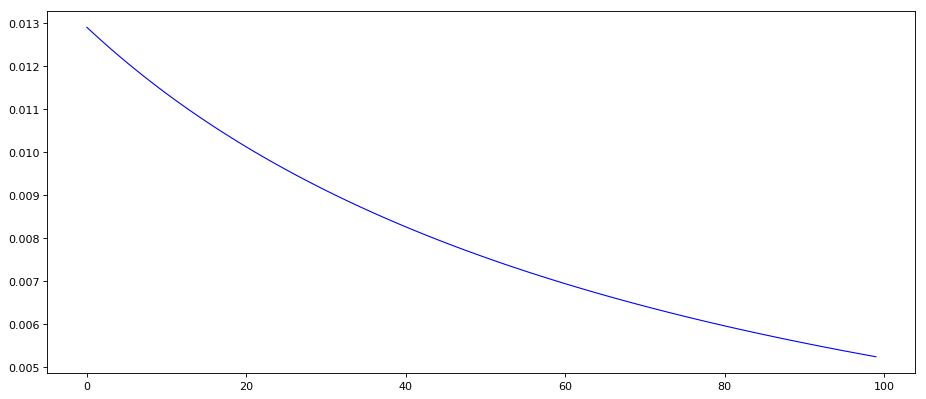

In [40]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)